In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
## 상호관계분석 필요 -> 차원축소

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
mort = pd.read_csv('./data.csv', header=0) # data about mortgage
mort.head()

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Status,OUTCOME,State,Median_state_inc,UPB>Appraisal
0,37,75650.0,85,669,N,1707,6000,169000,160000,0.284500,Active,non-default,FL,"40,171",0
1,46,390775.0,102,684,N,0,5025,310000,309000,0.000000,Pay-off,non-default,NY,"44,228",1
2,30,112500.0,90,662,Y,1812,4800,177000,176450,0.377500,Pay-off,non-default,CA,"49,894",0
3,24,85250.0,97,647,N,3395,6934,113000,110000,0.489616,Pay-off,non-default,GA,"43,217",0
4,35,114000.0,100,791,N,3801,5504,103000,103000,0.690589,Pay-off,non-default,NH,"57,352",1


# 범주형 데이터 수치화

In [3]:
## First_home 문자형 데이터 변환
mort['First_home'] = np.where(mort['First_home']=='Y',1,0)
mort['First_home']

0        0
1        0
2        1
3        0
4        0
        ..
10602    1
10603    0
10604    1
10605    1
10606    1
Name: First_home, Length: 10607, dtype: int32

In [4]:
## Status 데이터 변환
mort['Status'] = np.where(mort['Status']=='Active',0, mort['Status']) # Active = 0
mort['Status'] = np.where(mort['Status']=='Default',1, mort['Status']) # Default = 1
mort['Status'] = np.where(mort['Status']=='Pay-off',2, mort['Status']) # Pay-off = 2
print(mort['Status'])
print('Status', np.unique(mort['Status']))

st = pd.get_dummies(mort[['Status']])
print(st)

0        0
1        2
2        2
3        2
4        2
        ..
10602    2
10603    2
10604    2
10605    0
10606    0
Name: Status, Length: 10607, dtype: object
Status [0 1 2]
       Status_0  Status_1  Status_2
0             1         0         0
1             0         0         1
2             0         0         1
3             0         0         1
4             0         0         1
...         ...       ...       ...
10602         0         0         1
10603         0         0         1
10604         0         0         1
10605         1         0         0
10606         1         0         0

[10607 rows x 3 columns]


In [5]:
# column 추가
mort['Status_Active'] = np.nan
mort['Status_Default'] = np.nan
mort['Status_Payoff'] = np.nan
for k0 in range(0,10607):
    mort.Status_Active[k0] = int(st['Status_0'][k0])
for k1 in range(0,10607):
    mort.Status_Default[k1] = int(st['Status_1'][k1])
for k2 in range(0,10607):
    mort.Status_Payoff[k2] = int(st['Status_2'][k2])

mort

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Status,OUTCOME,State,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,0,non-default,FL,"40,171",0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,2,non-default,NY,"44,228",1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,2,non-default,CA,"49,894",0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,2,non-default,GA,"43,217",0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,2,non-default,NH,"57,352",1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,2,non-default,AZ,"42,590",1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,2,non-default,IL,"45,787",0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,2,non-default,GA,"43,217",0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,0,non-default,FL,"40,171",1,1.0,0.0,0.0


In [6]:
## 필요없는 열 제거
del mort['Status']
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,OUTCOME,State,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,non-default,FL,"40,171",0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,non-default,NY,"44,228",1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,non-default,CA,"49,894",0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,non-default,GA,"43,217",0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,non-default,NH,"57,352",1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,non-default,AZ,"42,590",1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,non-default,IL,"45,787",0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,non-default,GA,"43,217",0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,non-default,FL,"40,171",1,1.0,0.0,0.0


In [7]:
## OUTCOME 데이터 변환
mort['OUTCOME'] = np.where(mort['OUTCOME']=='non-default',0,1) # non-default = 0, default = 1
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,OUTCOME,State,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,0,FL,"40,171",0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,0,NY,"44,228",1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,0,CA,"49,894",0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,0,GA,"43,217",0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,0,NH,"57,352",1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,0,AZ,"42,590",1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,0,IL,"45,787",0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,0,GA,"43,217",0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,0,FL,"40,171",1,1.0,0.0,0.0


In [8]:
## string 타입을 정수로 변환하기
for k in range(0,10607):
    mort.Median_state_inc[k] = np.float64(mort.Median_state_inc[k].replace(",", ""))
    # print(mort.Median_state_inc[k]) <-- 확인용

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# find missing data
mort.isnull().sum()

Bo_Age                0
Ln_Orig               0
Orig_LTV_Ratio_Pct    0
Credit_score          0
First_home            0
Tot_mthly_debt_exp    0
Tot_mthly_incm        0
orig_apprd_val_amt    0
pur_prc_amt           0
DTI Ratio             0
OUTCOME               0
State                 0
Median_state_inc      0
UPB>Appraisal         0
Status_Active         0
Status_Default        0
Status_Payoff         0
dtype: int64

In [ ]:
sta = mort[['State']].values
print(sta)

In [ ]:
## State 특성 one hot encoding을 이용한 데이터 전처리
# 데이터 셋에서 필요한 부분들을 숫자로 변경
from sklearn import preprocessing
color_le = preprocessing.LabelEncoder() # 원핫인코딩을 위해 string을 int라벨을 변환함
sta = color_le.fit_transform(sta)
print(sta)

In [ ]:
sta_np = np.array(sta).reshape(-1,1)
sta_np

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe = ohe.fit_transform(sta_np).toarray() # 원핫인코딩으로 명목변수 변경 후 numpy로 변경
print(ohe)

In [ ]:
for k in range(0,10607):
    mort['State'][k] = ohe[k]
mort

In [10]:
del mort['State']
del mort['Status_Payoff']
del mort['Status_Default']
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,OUTCOME,Median_state_inc,UPB>Appraisal,Status_Active
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,0,40171,0,1.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,0,44228,1,0.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,0,49894,0,0.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,0,43217,0,0.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,0,57352,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,0,42590,1,0.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,0,45787,0,0.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,0,43217,0,0.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,0,40171,1,1.0


In [ ]:
np.array(mort.Median_state_inc, dtype=np.float64)
print(type(mort.Median_state_inc[1]))
print(type(mort.Status_Active[1]))
mort

In [11]:
outcome = mort.OUTCOME

mort.drop(['OUTCOME'], axis='columns', inplace=True)
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Median_state_inc,UPB>Appraisal,Status_Active
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,40171,0,1.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,44228,1,0.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,49894,0,0.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,43217,0,0.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,57352,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,42590,1,0.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,45787,0,0.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,43217,0,0.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,40171,1,1.0


In [30]:
del mort['orig_apprd_val_amt']

KeyError: 'orig_apprd_val_amt'

In [31]:
X, Y = mort, outcome

In [32]:
## training data와 test data 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [25]:
## Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [26]:
## train
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# mean accuracy
knn.score(X_test,Y_test)

0.9754948162111216

In [35]:
cor = mort.corr()

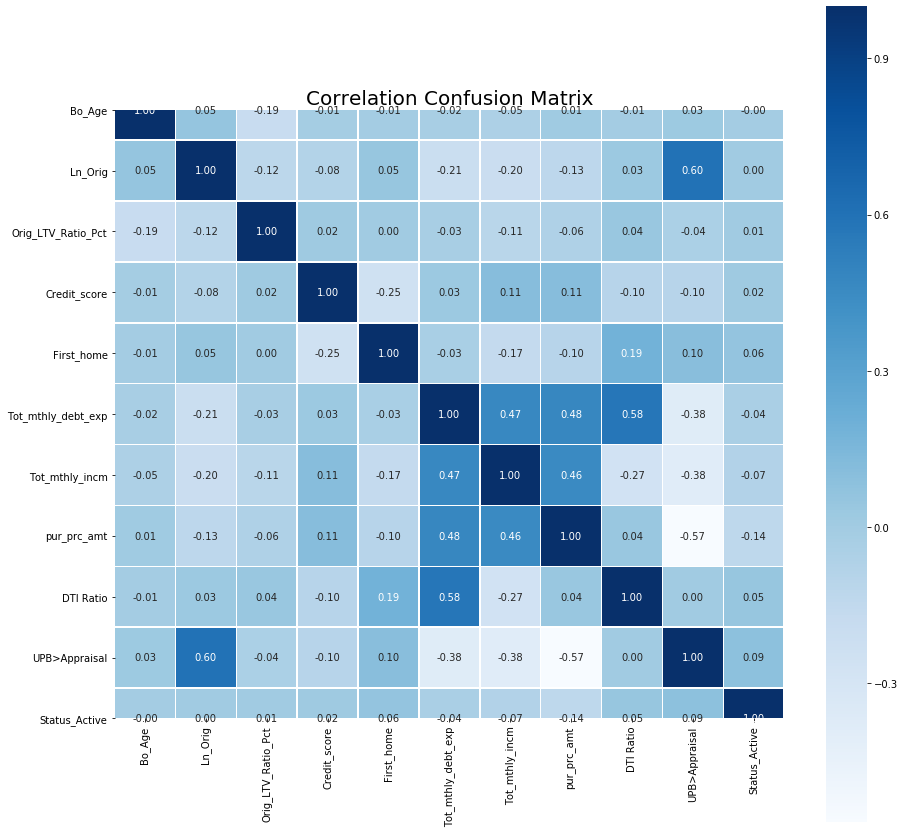

In [36]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,15))
plt.ylabel('Features')
plt.xlabel('Features')

title = 'Correlation Confusion Matrix'
plt.title(title, size = 20)

vis = sns.heatmap(data=cor, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues')
plt.show()

In [20]:
mort.corr()

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,UPB>Appraisal,Status_Active
Bo_Age,1.000000,0.054838,-0.187075,-0.009696,-0.008518,-0.023613,-0.047307,0.012477,0.013002,-0.008800,0.027124,-0.004514
Ln_Orig,0.054838,1.000000,-0.122721,-0.079500,0.051661,-0.208888,-0.201956,-0.152384,-0.129252,0.029545,0.600760,0.003501
Orig_LTV_Ratio_Pct,-0.187075,-0.122721,1.000000,0.018858,0.003774,-0.026365,-0.107458,-0.056270,-0.058493,0.044360,-0.041620,0.007862
Credit_score,-0.009696,-0.079500,0.018858,1.000000,-0.246631,0.029723,0.108713,0.116791,0.110295,-0.098423,-0.098703,0.015111
First_home,-0.008518,0.051661,0.003774,-0.246631,1.000000,-0.031812,-0.166751,-0.121540,-0.095895,0.186504,0.101171,0.061660
Tot_mthly_debt_exp,-0.023613,-0.208888,-0.026365,0.029723,-0.031812,1.000000,0.473039,0.464914,0.475294,0.576835,-0.381844,-0.037694
Tot_mthly_incm,-0.047307,-0.201956,-0.107458,0.108713,-0.166751,0.473039,1.000000,0.483977,0.461343,-0.265586,-0.384078,-0.073731
orig_apprd_val_amt,0.012477,-0.152384,-0.056270,0.116791,-0.121540,0.464914,0.483977,1.000000,0.953316,0.016569,-0.594247,-0.148494
pur_prc_amt,0.013002,-0.129252,-0.058493,0.110295,-0.095895,0.475294,0.461343,0.953316,1.000000,0.044723,-0.566130,-0.136115
DTI Ratio,-0.008800,0.029545,0.044360,-0.098423,0.186504,0.576835,-0.265586,0.016569,0.044723,1.000000,0.004392,0.049257


In [ ]:
type(mort['Median_state_inc'][0])

In [56]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(17,17))
plt.ylabel('Features')
plt.xlabel('Features')

title = 'Correlation Confusion Matrix'
plt.title(title, size = 20)

visual = sns.heatmap(cm, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues')

NameError: name 'confusion_matrix' is not defined

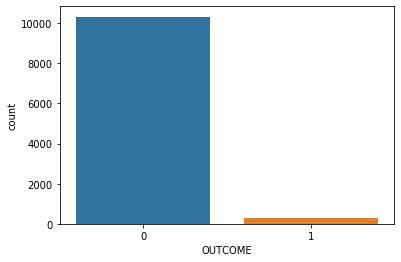

In [50]:
import seaborn as sns

sns.countplot(outcome)

In [49]:
np.shape(mort)

(10607, 12)

In [38]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(mort))
X_train_robustScaled = robustScaler.fit_transform(X_train)
X_test_robustScaled = robustScaler.transform(X_test)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
pred = knn.predict(X_test)

In [41]:
# mean accuracy
knn.score(X_test,Y_test)

0.9754948162111216

In [43]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((data>upper_bound) | (data<lower_bound))

In [63]:
## Tukey Fences를 이용한 이상치 제거
babe = outliers_iqr(mort.Bo_Age)[0]
for t in outliers_iqr(mort.Bo_Age)[0]:
    print(mort[t:t+1])

    Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
16      63  260775.0                  95           695           0   

    Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
16                 721            2215       115103   0.325508   

   Median_state_inc  UPB>Appraisal  Status_Active  
16            43217              1            1.0  
    Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
29      78  141744.0                  60           594           1   

    Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
29                1287            2279       114900   0.564721   

   Median_state_inc  UPB>Appraisal  Status_Active  
29            43217              1            1.0  
    Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
32      59  167200.0                  95           713           0   

    Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
32                1327            303

      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
3057      75  284000.0                  80           758           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
3057                2087            9900       322000   0.210808   

     Median_state_inc  UPB>Appraisal  Status_Active  
3057            49894              0            0.0  
      Bo_Age  Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
3137      62  69500.0                  80           738           1   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
3137                3577            7472       334615   0.478721   

     Median_state_inc  UPB>Appraisal  Status_Active  
3137            40171              0            0.0  
      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
3147      63  213750.0                  95           629           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
3147     

      Bo_Age  Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
6349      75  79200.0                  80           687           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
6349                1017            5213       122036   0.195089   

     Median_state_inc  UPB>Appraisal  Status_Active  
6349            42590              0            0.0  
      Bo_Age  Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
6350      59  78750.0                  75           751           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
6350                1068            2946        70000   0.362525   

     Median_state_inc  UPB>Appraisal  Status_Active  
6350            38550              1            1.0  
      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
6351      59  157325.0                 102           804           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
6351       

9247            49894              0            1.0  
      Bo_Age  Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
9346      61  95950.0                  98           715           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
9346                 683            4800       108000   0.142292   

     Median_state_inc  UPB>Appraisal  Status_Active  
9346            56763              0            0.0  
      Bo_Age  Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
9360      76  80000.0                  92           625           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
9360                1536            4953       115001   0.310115   

     Median_state_inc  UPB>Appraisal  Status_Active  
9360            49894              0            1.0  
      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
9368      64  203110.0                  97           653           0   

      Tot_mthly_debt_exp 

In [64]:
np.shape(babe)

(437,)

In [45]:
def outliers_z_score(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y-mean) / std for y in data]
    return np.where(np.abs(z_scores)>threshold)

In [52]:
## Z-Score를 이용한 이상치 제거
for t in outliers_z_score(mort.Bo_Age)[0]:
    print(mort[t:t+1])

    Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
29      78  141744.0                  60           594           1   

    Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
29                1287            2279       114900   0.564721   

   Median_state_inc  UPB>Appraisal  Status_Active  
29            43217              1            1.0  
     Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
141      73  111500.0                 100           789           0   

     Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
141                2783            8227       409000   0.338276   

    Median_state_inc  UPB>Appraisal  Status_Active  
141            49894              0            1.0  
     Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
214      79  100636.0                  97           789           0   

     Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
214                2428     

      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
3975      72  116100.0                  90           757           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
3975                2378            9914        80000   0.239863   

     Median_state_inc  UPB>Appraisal  Status_Active  
3975            40171              1            1.0  
      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
4006      70  180000.0                  80           647           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
4006                2321            6905       180000   0.336133   

     Median_state_inc  UPB>Appraisal  Status_Active  
4006            56763              0            0.0  
      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
4109      69  112000.0                 100           743           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
4109   

      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
9887      99  237650.0                  97           678           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
9887                1408            2560       114900       0.55   

     Median_state_inc  UPB>Appraisal  Status_Active  
9887            32589              1            0.0  
      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
9976      67  153200.0                  91           693           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
9976                 909            5985       123000    0.15188   

     Median_state_inc  UPB>Appraisal  Status_Active  
9976            46984              1            1.0  
      Bo_Age   Ln_Orig  Orig_LTV_Ratio_Pct  Credit_score  First_home  \
9992      75  102150.0                  90           731           0   

      Tot_mthly_debt_exp  Tot_mthly_incm  pur_prc_amt  DTI Ratio  \
9992   

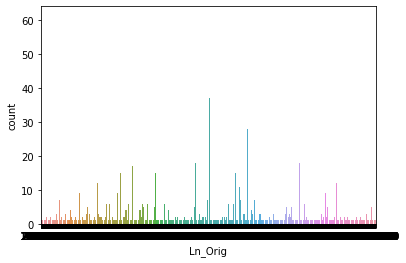

In [57]:

sns.countplot(k)

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

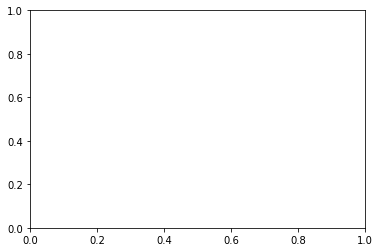

In [65]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.arange(0,100,10)
y1 = mort.Bo_Age
fig, ax = plt.subplots()
ax.plot(x1,y1)
plt.show()

In [75]:
y1 = mort.Bo_Age
np.shape(y1)[1] = 1

TypeError: 'tuple' object does not support item assignment